In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="ticks", palette="husl", color_codes=True)

In [16]:
from astropy.io import fits
from lvmdrp.core.spectrum1d import Spectrum1D


sky_fits = fits.open(
    "/home/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_2.fits")

sci_fits = fits.open(
    "/home/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_1.fits")

wl = sci_fits[1].data["lambda"]
sci_flux = sci_fits[1].data["flux"]
sky_flux = sky_fits[1].data["flux"]

sci_spec = Spectrum1D(wave=wl, data=sci_flux)
sky_spec = Spectrum1D(wave=wl, data=sky_flux)

In [17]:
from lvmdrp.core.sky import run_skycorr
from lvmdrp.core.constants import SKYCORR_CONFIG_PATH


config, config_name, skycorr_fit = run_skycorr(skycorr_config=SKYCORR_CONFIG_PATH, sci_spec=sci_spec,
    sky_spec=sky_spec, spec_label="test", specs_dir=os.path.abspath("_data-sky/"), out_dir=os.path.abspath("_data-sky/"),
    metadata={"MJD": sci_fits[1].header["MJD-OBS"], "TIME": sci_fits[1].header["TM-START"], "TELALT": sci_fits[1].header["ESO TEL ALT"]}
)


[ INFO  ] Skycorr 1.1.2
[ INFO  ] Using parameter file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test.skycorr.par
[ INFO  ] Input science data file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test.fits
[ INFO  ] Convert input science data file into /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test_out_sci.fits
[ INFO  ] Read /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test_out_sci.fits
[ INFO  ] Input sky data file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/SKY_test.fits
[ INFO  ] Convert input sky data file into /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test_out_sky.fits
[ INFO  ] Read /home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb/_data-sky/OBJ_test_out_sky.fits
[ INFO  ] Take keywords from FITS extension 1
[ INFO  ] Read keyword MJD-OBS
[ INFO  ] Read keyword TM-START
[ INFO  ] Read keyword ESO TEL ALT
[ INFO  ] Read line list /home/mejia/Research/UNAM/lvm-drp/lvmdr

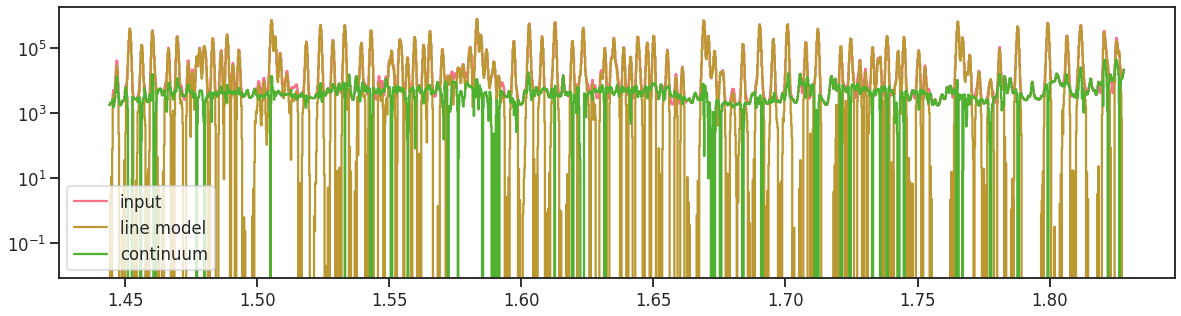

In [26]:
plt.figure(figsize=(20,5))

plt.step(skycorr_fit["lambda"], skycorr_fit["flux"], label="input")
plt.step(skycorr_fit["lambda"], skycorr_fit["mlflux"], label="line model")
plt.step(skycorr_fit["lambda"], skycorr_fit["flux"] - skycorr_fit["mlflux"], label="continuum")
plt.gca().set_yscale("log")
plt.legend()
